In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# TODO: Agregar las librerías que hagan falta
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import ParameterGrid
from sklearn.model_selection import GridSearchCV
from sklearn.utils.fixes import loguniform
from scipy import stats
from sklearn.model_selection import ParameterSampler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from random import randint
from sklearn.metrics import classification_report

In [2]:
dataset = pd.read_csv("loan_data.csv", comment="#")

# División entre instancias y etiquetas
X, y = dataset.iloc[:, 1:], dataset.TARGET

# división entre entrenamiento y evaluación
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [3]:
dataset

,TARGET,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,0,4700,88026.0,115506.0,6.0,0.0,0.0,182.248332,0.0,27.0,29.209023
1,0,19300,39926.0,101208.0,4.0,0.0,0.0,140.051638,0.0,14.0,31.545694
2,0,5700,71556.0,79538.0,2.0,0.0,0.0,92.643085,0.0,15.0,41.210012
3,0,13000,44875.0,57713.0,0.0,1.0,0.0,184.990324,1.0,12.0,28.602076
4,0,19300,72752.0,106084.0,11.0,0.0,0.0,193.707100,1.0,13.0,30.686106
...,...,...,...,...,...,...,...,...,...,...,...
1849,1,53400,228236.0,305514.0,6.0,0.0,0.0,11.148069,0.0,2.0,34.558417
1850,1,53600,235895.0,299772.0,5.0,0.0,0.0,112.748282,7.0,22.0,44.945929
1851,1,53600,208197.0,297280.0,4.0,1.0,1.0,160.485251,2.0,29.0,41.646731
1852,1,65500,205156.0,290239.0,2.0,0.0,0.0,98.808206,1.0,21.0,144.189001


## Ejercicio 1: Descripción de los Datos y la Tarea

Responder las siguientes preguntas:

1. ¿De qué se trata el conjunto de datos?
2. ¿Cuál es la variable objetivo que hay que predecir? ¿Qué significado tiene?
3. ¿Qué información (atributos) hay disponible para hacer la predicción?
4. ¿Qué atributos imagina ud. que son los más determinantes para la predicción?

**No hace falta escribir código para responder estas preguntas.**

1. El conjunto de datos trata sobre préstamos y está basado en el conjunto de datos de Kaggle Home Equity. El conjunto de datos trata sobre el valor líquido de la vivienda (HMEQ) contiene información de referencia y de rendimiento de préstamos.
2. La variable objetivo a predecir es TARGET, es una variable binaria que indica si un solicitante eventualmente incurrió en incumplimiento o fue gravemente moroso.
3. Los atributos disponibles para hacer la predicción son:


* LOAN: Monto de la solicitud de préstamo
* MORTDUE: Monto adeudado de la hipoteca existente
* VALUE: Valor de la propiedad actual
* YOJ: Años en el trabajo actual
* DEROG: Número de informes despectivos importantes
* DELINQ: Número de líneas de crédito morosas
* CLAGE: Antigüedad de la línea comercial más antigua en meses
* NINQ: Número de líneas de crédito recientes
* CLNO: Número de líneas de crédito
* DEBTINC: Relación deuda-ingresos
4. Consideramos que los atributos mas determinantes para realizar la predicción son:
* LOAN, MORTDUE, YOJ, DELINQ, DEBTINC

## Ejercicio 2: Predicción con Modelos Lineales

En este ejercicio se entrenarán modelos lineales de clasificación para predecir la variable objetivo.

Para ello, deberán utilizar la clase SGDClassifier de scikit-learn.

Documentación:
- https://scikit-learn.org/stable/modules/sgd.html
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html


### Ejercicio 2.1: SGDClassifier con hiperparámetros por defecto

Entrenar y evaluar el clasificador SGDClassifier usando los valores por omisión de scikit-learn para todos los parámetros. Únicamente **fijar la semilla aleatoria** para hacer repetible el experimento.

Evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión

In [4]:
#pruebo escalando previamente los datos por recomendacion de la documentacion
model = make_pipeline(StandardScaler(), SGDClassifier(random_state=123))
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
print('train accuracy score ', accuracy_score(y_train,y_train_pred).round(2))
print('test accuracy score ', accuracy_score(y_test,y_test_pred).round(2))
print('train precision score ', precision_score(y_train,y_train_pred).round(2))
print('test precision score ', precision_score(y_test,y_test_pred).round(2))
print('train recall score ', recall_score(y_train,y_train_pred) .round(2))
print('test recall score ', recall_score(y_test,y_test_pred) .round(2))
print('train f1 score ', f1_score(y_train,y_train_pred).round(2))
print('test f1 score ', f1_score(y_test,y_test_pred).round(2))

train accuracy score  0.85
test accuracy score  0.85
train precision score  0.58
test precision score  0.57
train recall score  0.33
test recall score  0.29
train f1 score  0.42
test f1 score  0.39


In [5]:
target_names = ['repaid', 'defaulted']
print("Reporte de train")
print(classification_report(y_train, y_train_pred, target_names=target_names))

Reporte de train
              precision    recall  f1-score   support

      repaid       0.88      0.95      0.91      1232
   defaulted       0.58      0.33      0.42       251

    accuracy                           0.85      1483
   macro avg       0.73      0.64      0.67      1483
weighted avg       0.83      0.85      0.83      1483



In [6]:
target_names = ['repaid', 'defaulted']
print("Reporte de test")
print(classification_report(y_test, y_test_pred, target_names=target_names))

Reporte de test
              precision    recall  f1-score   support

      repaid       0.88      0.96      0.92       313
   defaulted       0.57      0.29      0.39        58

    accuracy                           0.85       371
   macro avg       0.72      0.63      0.65       371
weighted avg       0.83      0.85      0.83       371



matriz de confusion train
[[1171   61]
 [ 167   84]]
matriz de confusion train


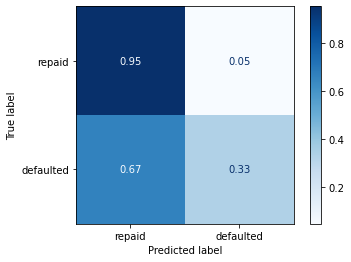

In [7]:
cm=confusion_matrix(y_train,y_train_pred)
print('matriz de confusion train')
print(cm)
tn, fp, fn, tp = confusion_matrix(y_train,y_train_pred).ravel()
print('matriz de confusion train')
plot_confusion_matrix(model.fit(X_train, y_train), X_train, y_train,
                                 display_labels=target_names,
                                 cmap=plt.cm.Blues,
                                 normalize='true')

matriz de confusion test
[[300  13]
 [ 41  17]]
matriz de confusion test


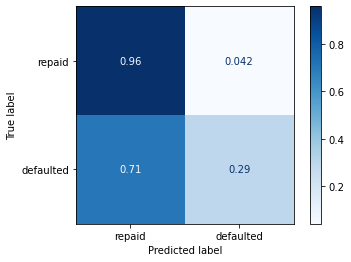

In [8]:
cm=confusion_matrix(y_test,y_test_pred)
print('matriz de confusion test')
print(cm)
tn, fp, fn, tp = confusion_matrix(y_test,y_test_pred).ravel()
print('matriz de confusion test')
plot_confusion_matrix(model.fit(X_train, y_train), X_test, y_test,
                                 display_labels=target_names,
                                 cmap=plt.cm.Blues,
                                 normalize='true')

Se puede ver como los datos están desbalanceados, por ello podemos ver que las métricas pueden ser muy altas para predecir el repaid y muy malas para el defaulted.

In [9]:
# Balanceamos el dataset
from imblearn.over_sampling import SMOTE
over = SMOTE()
X_bal, y_bal = over.fit_resample(X_train, y_train)

In [10]:
#pruebo escalando previamente los datos por recomendacion de la documentacion
model_balanced = make_pipeline(StandardScaler(), SGDClassifier(random_state=123))
model_balanced.fit(X_bal, y_bal)
y_train_pred = model_balanced.predict(X_bal)
y_test_pred = model_balanced.predict(X_test)
print('train accuracy score ', accuracy_score(y_bal,y_train_pred).round(2))
print('test accuracy score ', accuracy_score(y_test,y_test_pred).round(2))
print('train precision score ', precision_score(y_bal,y_train_pred).round(2))
print('test precision score ', precision_score(y_test,y_test_pred).round(2))
print('train recall score ', recall_score(y_bal,y_train_pred) .round(2))
print('test recall score ', recall_score(y_test,y_test_pred) .round(2))
print('train f1 score ', f1_score(y_bal,y_train_pred).round(2))
print('test f1 score ', f1_score(y_test,y_test_pred).round(2))

train accuracy score  0.75
test accuracy score  0.74
train precision score  0.76
test precision score  0.33
train recall score  0.74
test recall score  0.67
train f1 score  0.75
test f1 score  0.45


In [11]:
print("Reporte de train")
print(classification_report(y_bal, y_train_pred, target_names=target_names))

Reporte de train
              precision    recall  f1-score   support

      repaid       0.75      0.77      0.76      1232
   defaulted       0.76      0.74      0.75      1232

    accuracy                           0.75      2464
   macro avg       0.75      0.75      0.75      2464
weighted avg       0.75      0.75      0.75      2464



In [12]:
print("Reporte de test")
print(classification_report(y_test, y_test_pred, target_names=target_names))

Reporte de test
              precision    recall  f1-score   support

      repaid       0.93      0.75      0.83       313
   defaulted       0.33      0.67      0.45        58

    accuracy                           0.74       371
   macro avg       0.63      0.71      0.64       371
weighted avg       0.83      0.74      0.77       371



matriz de confusion train
[[945 287]
 [321 911]]
matriz de confusion train


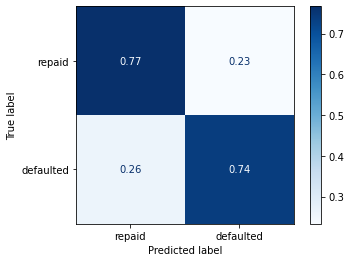

In [13]:
cm=confusion_matrix(y_bal,y_train_pred)
print('matriz de confusion train')
print(cm)
tn, fp, fn, tp = confusion_matrix(y_bal,y_train_pred).ravel()
print('matriz de confusion train')
plot_confusion_matrix(model_balanced.fit(X_bal, y_bal), X_bal, y_bal,
                                 display_labels=target_names,
                                 cmap=plt.cm.Blues,
                                 normalize='true')

matriz de confusion test
[[235  78]
 [ 19  39]]
matriz de confusion test


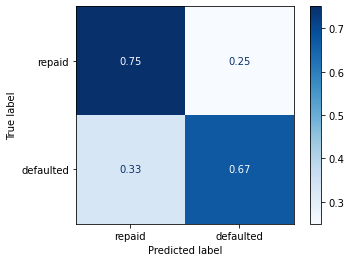

In [14]:
cm=confusion_matrix(y_test,y_test_pred)
print('matriz de confusion test')
print(cm)
tn, fp, fn, tp = confusion_matrix(y_test,y_test_pred).ravel()
print('matriz de confusion test')
plot_confusion_matrix(model_balanced.fit(X_bal, y_bal), X_test, y_test,
                                 display_labels=target_names,
                                 cmap=plt.cm.Blues,
                                 normalize='true')

Vemos como el modelo balanceado predice mejor los valores de test de ambas clases. Es capaz de predecir las dos etiquetas con un accuracy mas balanceado. En el anterior veiamos como el modelo solo era bueno prediciendo una sola etiqueta, con la otra tenía mucho porcentaje de predecidos como repaid siendo defaulted.

### Ejercicio 2.2: Ajuste de Hiperparámetros

Seleccionar valores para los hiperparámetros principales del SGDClassifier. Como mínimo, probar diferentes funciones de loss, tasas de entrenamiento y tasas de regularización.

Para ello, usar grid-search y 5-fold cross-validation sobre el conjunto de entrenamiento para explorar muchas combinaciones posibles de valores.

Reportar accuracy promedio y varianza para todas las configuraciones.

Para la mejor configuración encontrada, evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión

Documentación:
- https://scikit-learn.org/stable/modules/grid_search.html
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [15]:
param_grid = {
    'loss': [ 'hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron'],
    'learning_rate': ['optimal','constant','invscaling','adaptive'],
    'alpha':loguniform(1e-1, 1e2),
    'penalty':['l2', 'l1', 'elasticnet']
}

In [16]:
#tengo que escalar por separado
scaler=StandardScaler()
X_bal_scaled = scaler.fit_transform(X_bal)
model = SGDClassifier(random_state=123,eta0=1)

cv = RandomizedSearchCV(model, param_grid, n_iter=10, cv=5, random_state=123)
cv.fit(X_bal_scaled, y_bal);#aca no deberia ir X_train e y_train?

In [17]:
results = cv.cv_results_
df = pd.DataFrame(results)
df[['param_loss', 'param_alpha','param_penalty','param_learning_rate', 'mean_test_score', 
    'std_test_score', 'rank_test_score']]

,param_loss,param_alpha,param_penalty,param_learning_rate,mean_test_score,std_test_score,rank_test_score
0,modified_huber,12.285916,l2,invscaling,0.626263,0.068702,5
1,squared_hinge,11.821009,elasticnet,constant,0.525152,0.048785,6
2,log,1.859171,l2,invscaling,0.709416,0.005456,4
3,log,5.483816,l2,adaptive,0.735809,0.022311,3
4,log,1.07037,elasticnet,adaptive,0.499189,0.000406,10
5,hinge,0.15102,l2,optimal,0.739458,0.016613,1
6,modified_huber,7.859159,l2,adaptive,0.737841,0.022658,2
7,hinge,3.932368,l1,optimal,0.500000,0.000907,8
8,squared_hinge,35.342347,l2,constant,0.515822,0.056379,7
9,log,1.18355,l1,invscaling,0.500000,0.000907,8


In [18]:
#utilizo el mejor rankeado
model_rank = make_pipeline(StandardScaler(), 
                      SGDClassifier(
                          loss='hinge',
                          alpha=0.15102	,
                          penalty='l2',
                          learning_rate='optimal',
                          eta0=1,
                          random_state=123))
model_rank.fit(X_bal, y_bal)
y_train_pred = model_rank.predict(X_bal)
y_test_pred = model_rank.predict(X_test)
print("Reporte de train")
print(classification_report(y_bal, y_train_pred, target_names=target_names))
print("Reporte de test")
print(classification_report(y_test, y_test_pred, target_names=target_names))

Reporte de train
              precision    recall  f1-score   support

      repaid       0.70      0.86      0.77      1232
   defaulted       0.82      0.62      0.71      1232

    accuracy                           0.74      2464
   macro avg       0.76      0.74      0.74      2464
weighted avg       0.76      0.74      0.74      2464

Reporte de test
              precision    recall  f1-score   support

      repaid       0.93      0.86      0.89       313
   defaulted       0.46      0.64      0.54        58

    accuracy                           0.83       371
   macro avg       0.70      0.75      0.72       371
weighted avg       0.86      0.83      0.84       371



matriz de confusion train
[[1059  173]
 [ 462  770]]
matriz de confusion train


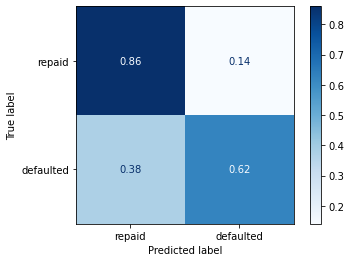

In [19]:
cm=confusion_matrix(y_bal,y_train_pred)
print('matriz de confusion train')
print(cm)
tn, fp, fn, tp = confusion_matrix(y_bal,y_train_pred).ravel()
print('matriz de confusion train')
plot_confusion_matrix(model_rank.fit(X_bal, y_bal), X_bal, y_bal,
                                 display_labels=target_names,
                                 cmap=plt.cm.Blues,
                                 normalize='true')

matriz de confusion test
[[270  43]
 [ 21  37]]
matriz de confusion test


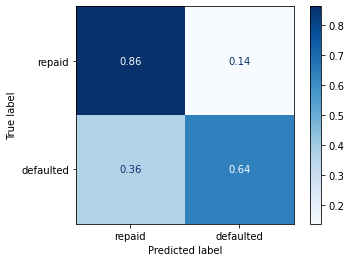

In [20]:
cm=confusion_matrix(y_test,y_test_pred)
print('matriz de confusion test')
print(cm)
tn, fp, fn, tp = confusion_matrix(y_test,y_test_pred).ravel()
print('matriz de confusion test')
plot_confusion_matrix(model_rank.fit(X_bal, y_bal), X_test, y_test,
                                 display_labels=target_names,
                                 cmap=plt.cm.Blues,
                                 normalize='true')

Al seleccionar los hiperparámetros, mejoraron los métricas de accuracy y f1-score. En problemas de clasificación de datos desbalanceados, f1-score es una mejor métrica para evaluar un modelo.

## Ejercicio 3: Árboles de Decisión

En este ejercicio se entrenarán árboles de decisión para predecir la variable objetivo.

Para ello, deberán utilizar la clase DecisionTreeClassifier de scikit-learn.

Documentación:
- https://scikit-learn.org/stable/modules/tree.html
  - https://scikit-learn.org/stable/modules/tree.html#tips-on-practical-use
- https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
- https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html

### Ejercicio 3.1: DecisionTreeClassifier con hiperparámetros por defecto

Entrenar y evaluar el clasificador DecisionTreeClassifier usando los valores por omisión de scikit-learn para todos los parámetros. Únicamente **fijar la semilla aleatoria** para hacer repetible el experimento.

Evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión

In [21]:
model_dtc = DecisionTreeClassifier(random_state=123)
model_dtc.fit(X_bal, y_bal)
y_train_pred = model_dtc.predict(X_bal)
y_test_pred = model_dtc.predict(X_test)
print("Reporte de train")
print(classification_report(y_bal, y_train_pred, target_names=target_names))
print("Reporte de test")
print(classification_report(y_test, y_test_pred, target_names=target_names))

Reporte de train
              precision    recall  f1-score   support

      repaid       1.00      1.00      1.00      1232
   defaulted       1.00      1.00      1.00      1232

    accuracy                           1.00      2464
   macro avg       1.00      1.00      1.00      2464
weighted avg       1.00      1.00      1.00      2464

Reporte de test
              precision    recall  f1-score   support

      repaid       0.94      0.92      0.93       313
   defaulted       0.61      0.71      0.66        58

    accuracy                           0.88       371
   macro avg       0.78      0.81      0.79       371
weighted avg       0.89      0.88      0.89       371



Si no se le hace pruning el arbol de decisión overfitea por los datos de train.

matriz de confusion train
[[1232    0]
 [   0 1232]]
matriz de confusion train


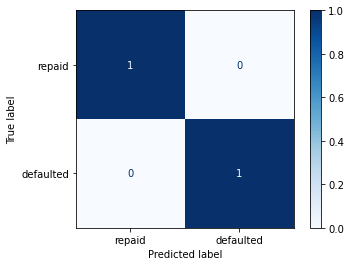

In [22]:
cm=confusion_matrix(y_bal,y_train_pred)
print('matriz de confusion train')
print(cm)
tn, fp, fn, tp = confusion_matrix(y_bal,y_train_pred).ravel()
print('matriz de confusion train')
plot_confusion_matrix(model_dtc.fit(X_bal, y_bal), X_bal, y_bal,
                                 display_labels=target_names,
                                 cmap=plt.cm.Blues,
                                 normalize='true')

matriz de confusion test
[[287  26]
 [ 17  41]]
matriz de confusion test


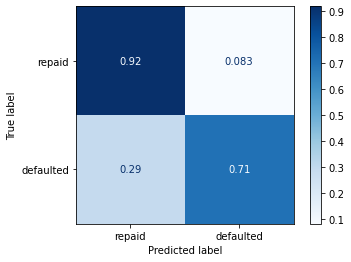

In [23]:
cm=confusion_matrix(y_test,y_test_pred)
print('matriz de confusion test')
print(cm)
tn, fp, fn, tp = confusion_matrix(y_test,y_test_pred).ravel()
print('matriz de confusion test')
plot_confusion_matrix(model_dtc.fit(X_bal, y_bal), X_test, y_test,
                                 display_labels=target_names,
                                 cmap=plt.cm.Blues,
                                 normalize='true')

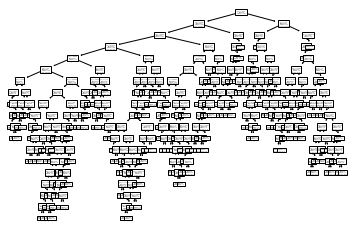

In [24]:
plot_tree(model_dtc);

### Ejercicio 3.2: Ajuste de Hiperparámetros

Seleccionar valores para los hiperparámetros principales del DecisionTreeClassifier. Como mínimo, probar diferentes criterios de partición (criterion), profundidad máxima del árbol (max_depth), y cantidad mínima de samples por hoja (min_samples_leaf).

Para ello, usar grid-search y 5-fold cross-validation sobre el conjunto de entrenamiento para explorar muchas combinaciones posibles de valores.

Reportar accuracy promedio y varianza para todas las configuraciones.

Para la mejor configuración encontrada, evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión


Documentación:
- https://scikit-learn.org/stable/modules/grid_search.html
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [34]:
param_grid = {
    'criterion': [ 'gini', 'entropy'],
    'max_depth': [4,5,6,7,8,9,10,11,12,13,14],
    'min_samples_leaf':[2,3,4,5,6,7,8,9,10,11,12]
}

In [35]:
model = DecisionTreeClassifier(random_state=123)

cv = RandomizedSearchCV(model, param_grid, n_iter=10, cv=5, random_state=123)
cv.fit(X_bal, y_bal)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=123),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [4, 5, 6, 7, 8, 9, 10, 11,
                                                      12, 13, 14],
                                        'min_samples_leaf': [2, 3, 4, 5, 6, 7,
                                                             8, 9, 10, 11,
                                                             12]},
                   random_state=123)

In [36]:
results = cv.cv_results_
df = pd.DataFrame(results)
df[['param_criterion', 'param_max_depth','param_min_samples_leaf', 'mean_test_score', 
    'std_test_score', 'rank_test_score']]

,param_criterion,param_max_depth,param_min_samples_leaf,mean_test_score,std_test_score,rank_test_score
0,entropy,5,7,0.817791,0.058152,10
1,gini,5,10,0.819412,0.046054,9
2,entropy,12,4,0.876631,0.064787,1
3,entropy,8,4,0.848628,0.062260,5
4,gini,6,11,0.823871,0.045969,8
5,entropy,9,9,0.842536,0.049068,6
6,entropy,10,8,0.856740,0.049902,4
7,gini,11,5,0.863644,0.043207,3
8,gini,12,5,0.872167,0.042060,2
9,gini,6,4,0.841324,0.037399,7


In [37]:
#utilizo el mejor rankeado
model =  DecisionTreeClassifier(criterion='entropy',max_depth=12,min_samples_leaf=4,random_state=123)
                            
model.fit(X_bal, y_bal)
y_train_pred = model.predict(X_bal)
y_test_pred = model.predict(X_test)
print("Reporte de train")
print(classification_report(y_bal, y_train_pred, target_names=target_names))
print("Reporte de test")
print(classification_report(y_test, y_test_pred, target_names=target_names))

Reporte de train
              precision    recall  f1-score   support

      repaid       0.96      0.96      0.96      1232
   defaulted       0.96      0.96      0.96      1232

    accuracy                           0.96      2464
   macro avg       0.96      0.96      0.96      2464
weighted avg       0.96      0.96      0.96      2464

Reporte de test
              precision    recall  f1-score   support

      repaid       0.93      0.87      0.90       313
   defaulted       0.47      0.64      0.54        58

    accuracy                           0.83       371
   macro avg       0.70      0.75      0.72       371
weighted avg       0.86      0.83      0.84       371



matriz de confusion train
[[1185   47]
 [  50 1182]]
matriz de confusion train


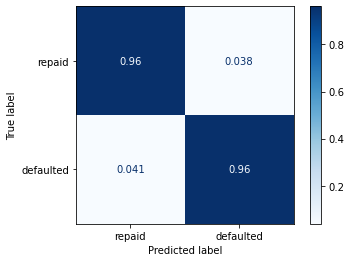

In [38]:
cm=confusion_matrix(y_bal,y_train_pred)
print('matriz de confusion train')
print(cm)
tn, fp, fn, tp = confusion_matrix(y_bal,y_train_pred).ravel()
print('matriz de confusion train')
plot_confusion_matrix(model.fit(X_bal, y_bal), X_bal, y_bal,
                                 display_labels=target_names,
                                 cmap=plt.cm.Blues,
                                 normalize='true')

matriz de confusion test
[[272  41]
 [ 21  37]]
matriz de confusion test


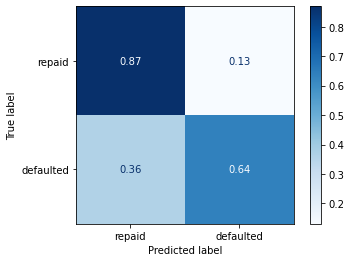

In [39]:
cm=confusion_matrix(y_test,y_test_pred)
print('matriz de confusion test')
print(cm)
tn, fp, fn, tp = confusion_matrix(y_test,y_test_pred).ravel()
print('matriz de confusion test')
plot_confusion_matrix(model.fit(X_bal, y_bal), X_test, y_test,
                                 display_labels=target_names,
                                 cmap=plt.cm.Blues,
                                 normalize='true')

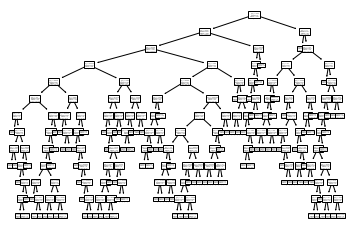

In [42]:
plot_tree(model);

No se observan mejors en test realizando la selección de hiperparámetros.

Obtenemos mejores resultados con el modelo de árboles de clasificación comparado con el SDGClassifier